In [1]:
import osmnx as ox
import networkx as nx
import random
from pathlib import Path
import os

In [2]:
def save_dimacs_graph(G: nx.Graph, file: Path, comment: str = ""):
    """Save graph in DIMACS .gr format with nodes renumbered from 1..N."""
    mapping = {node: idx + 1 for idx, node in enumerate(G.nodes())}
    
    with file.open("w") as f:
        f.write(f"c {comment}\n")
        f.write(f"p sp {G.number_of_nodes()} {G.number_of_edges() * 2}\n")
        
        for u, v, data in G.edges(data=True):
            if "travel_time" not in data:
                raise ValueError(f"There is no weight in graph '{file.name}'")
            w = int(data["travel_time"])
            f.write(f"a {mapping[u]} {mapping[v]} {w}\n")
            f.write(f"a {mapping[v]} {mapping[u]} {w}\n")

In [4]:
places = [
    # "Beijing, China",
    # "Berlin, Germany",
    # "London, England, UK",
    # "São Paulo, Brazil",
    # "Sydney, Australia",
    # "Toronto, Canada",
    # "Moscow, Russia",
    "Dubai"
]

for place in places:
    print(f"Downloading '{place}'...")
    G = ox.graph_from_place(place, network_type="drive")
    
    G = ox.add_edge_speeds(G)
    G = ox.add_edge_travel_times(G)
    
    G = nx.Graph(G)
    
    Gcc = max(nx.connected_components(G), key=len)
    G_sub = G.subgraph(Gcc).copy()
    
    print(f"\t{len(G_sub)} nodes, {len(G_sub.edges)} edges")
    file = Path("../dataset-my") / f"{place.split(",", maxsplit=2)[0].lower()}.gr"
    print(f"Saving to '{file.name}'...")
    save_dimacs_graph(G, file, comment=place)
    print(f"\tTotal file size: {os.path.getsize(file)} bytes")

	60603 nodes, 87459 edges
Saving to 'dubai.gr'...
	Total file size: 2783726 bytes


# Рисунки графов

In [ ]:
# Visualizing 
G = ox.graph_from_place("Saint Petersburg, Russia", network_type="drive")
edge_centrality = nx.closeness_centrality(nx.line_graph(G))
nx.set_edge_attributes(G, edge_centrality, "edge_centrality")

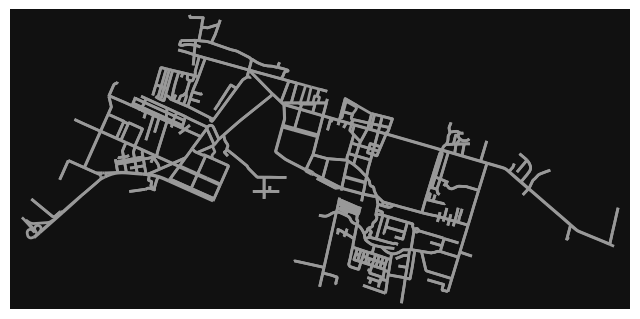

In [ ]:
# color edges in original graph with closeness centralities from line graph
ec = ox.plot.get_edge_colors_by_attr(G, "edge_centrality", cmap="inferno")
fig, ax = ox.plot.plot_graph(G, edge_color=ec, edge_linewidth=2, node_size=0)